# Solver for the two-body problem
In this notebook I will modify *2_body_E_S.ipynb* to use the **Runge-Kutta** method for updating Earth's position and velocity.

In [1]:
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt

In [2]:
G=6.674e-11  # m^3/kg*s^2
M_S=1.989e30  # kg
M_T=5.972e24  # kg

In [3]:
#acceleration function
def acceleration(pos):
    r=np.linalg.norm(pos)
    return -G*M_S*pos/r**3

#Runge-Kutta integration method
def runge_kutta(pos,vel,dt):
    k1v=acceleration(pos)*dt
    k1x=vel*dt

    k2v=acceleration(pos+k1x/2)*dt
    k2x=(vel+k1v/2)*dt

    k3v=acceleration(pos+k2x/2)*dt
    k3x=(vel+k2v/2)*dt

    k4v=acceleration(pos+k3x)*dt
    k4x=(vel+k3v)*dt

    new_vel=vel+(k1v+2*k2v+2*k3v+k4v)/6
    new_pos=pos+(k1x+2*k2x+2*k3x+k4x)/6

    return new_pos,new_vel

# Eulero integration method
def eulero(pos,vel,dt):
    new_vel=vel+acceleration(pos)*dt
    new_pos=pos+new_vel*dt
    return new_pos,new_vel


In [4]:
#time step
dt=86400  #seconds in one day
#number of years
N=1
#notal time for simulation in seconds
T=N*365.25*dt  #seconds in N years
time=np.arange(0,T,dt)

#initial position of Earth (I chose the perihelion)
r_p=1.471e11  # m
E_pos=np.array([r_p, 0])

#initial velocity of Earth at perihelion
E_vel=np.array([0,30e3])  # m/s

#lists to store position, velocity, and acceleration for plotting
pos_=[]
vel=[]
acc=[]
posx=[]
posy=[]

#iteration to update Earth's position
for t in time:
    pos_.append(E_pos)
    vel.append(E_vel)
    acc.append(acceleration(E_pos))
    E_pos,E_vel=runge_kutta(E_pos,E_vel,dt)

    posx.append(E_pos[0])
    posy.append(E_pos[1])

#convert lists to arrays
pos=np.array(pos_)
vel=np.array(vel)
acc=np.array(acc)


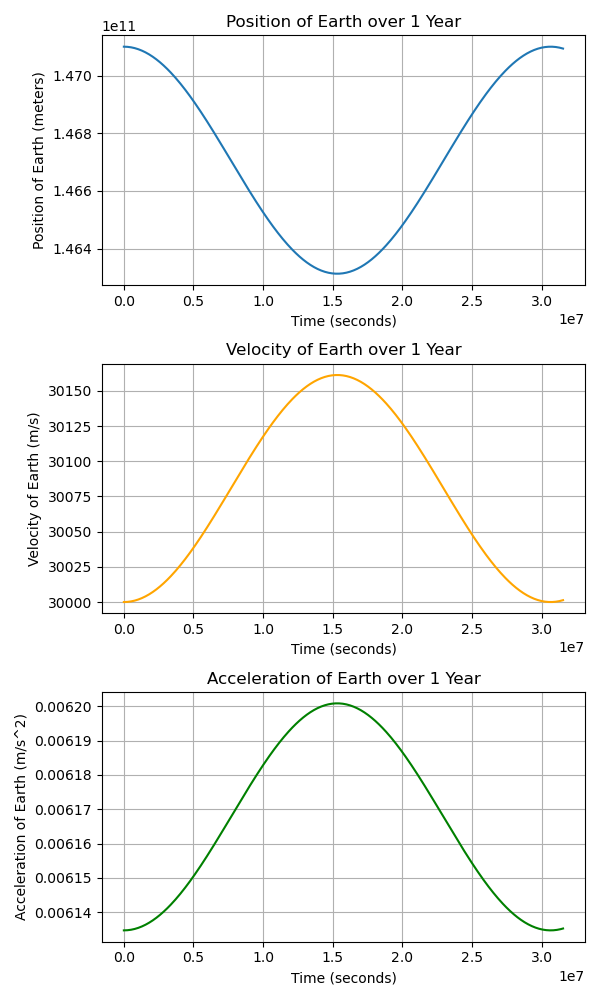

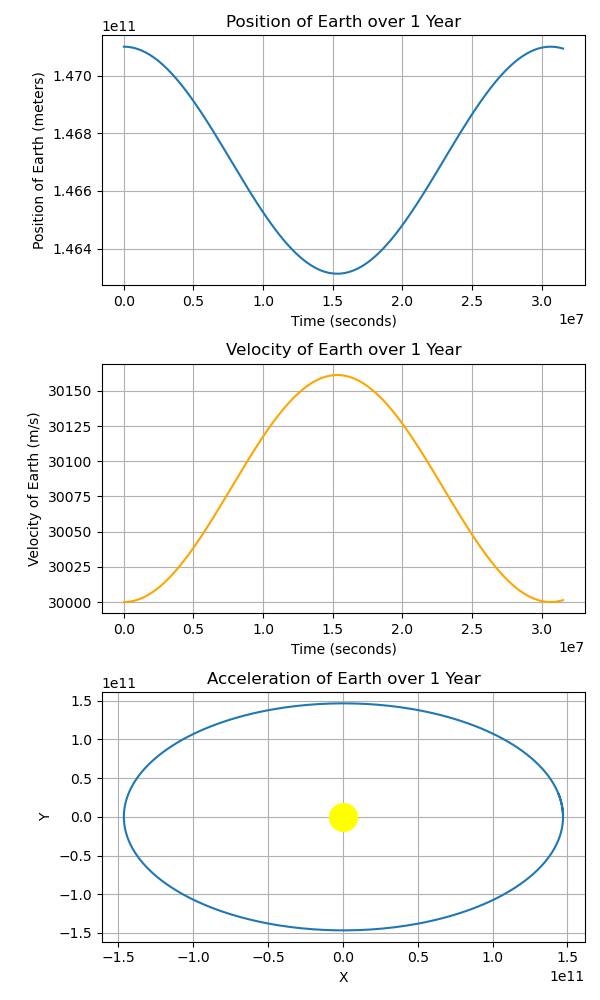

In [5]:
#plotting position
plt.figure(figsize=(6,10))
plt.subplot(3,1,1)
plt.plot(time,np.linalg.norm(pos,axis=1))
plt.xlabel('Time (seconds)')
plt.ylabel('Position of Earth (meters)')
if N==1:
    plt.title('Position of Earth over {} Year'.format(N))
else:
    plt.title('Position of Earth over {} Years'.format(N))
plt.grid(True)

#plotting velocity
plt.subplot(3,1,2)
plt.plot(time,np.linalg.norm(vel,axis=1),color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity of Earth (m/s)')
if N==1:
    plt.title('Velocity of Earth over {} Year'.format(N))
else:
    plt.title('Velocity of Earth over {} Years'.format(N))
plt.grid(True)

#plotting acceleration
plt.subplot(3,1,3)
plt.plot(time, np.linalg.norm(acc,axis=1),color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration of Earth (m/s^2)')
if N==1:
    plt.title('Acceleration of Earth over {} Year'.format(N))
else:
    plt.title('Acceleration of Earth over {} Years'.format(N))
plt.grid(True)

plt.tight_layout()
plt.show()


plt.plot(posx, posy)
plt.plot(0,0,marker="o", markersize=20, color="yellow")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()